In [1]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library

import typing

In [437]:
virus_df = pd.read_csv("virus_hw2.csv")

In [438]:
virus_df.head(3)

,PatientID,Address,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,...,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,TestResultsCode
0,0,8520 Dougherty Common Apt. 318\nLake Annamouth...,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,...,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741,flue_Spreader_NotatRisk
1,1,"9338 Griffin Route\nThorntonshire, WY 36917",NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,...,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451,measles_NotSpreader_NotatRisk
2,2,"8350 Adam Streets\nLake Angelaberg, MS 13029",NaN,270.970619,562.33635,1151.389973,NaN,NaN,NaN,NaN,...,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610,not_detected_NotSpreader_atRisk


**Splitting the data**

In [439]:
train_ds_part = 0.75
valid_ds_part = 0.15
test_ds_part = 0.10

total_ds_rows_n = virus_df.shape[0]

train_ds_part_int = round(total_ds_rows_n * train_ds_part)
valid_ds_part_int = round(total_ds_rows_n * valid_ds_part)
test_ds_part_int = total_ds_rows_n - valid_ds_part_int - train_ds_part_int


train_end_idx = train_ds_part_int
valid_end_idx = train_ds_part_int+valid_ds_part_int

split_data = np.split(virus_df, [train_end_idx, valid_end_idx], axis=0)

print(f"Total size: {total_ds_rows_n}\n\
Train df: {split_data[0].shape[0]}\n\
Valid df: {split_data[1].shape[0]}\n\
Test df: {split_data[2].shape[0]}")

ds_obj = {}

ds_obj["train"] = split_data[0]
ds_obj["train_original"] = split_data[0]

ds_obj["valid"] = split_data[1]
ds_obj["valid_original"] = split_data[1]

ds_obj["test"] = split_data[2]
ds_obj["test_original"] = split_data[2]


Total size: 5000
Train df: 3750
Valid df: 750
Test df: 500


**Analyzing the correct type for each attribute**

In [440]:
virus_df.describe()

,PatientID,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,DisciplineScore,...,pcrResult15,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9
count,5000.000000,3987.000000,3970.000000,3989.000000,3968.000000,4036.000000,756.000000,750.000000,3983.000000,3975.000000,...,3976.000000,4033.000000,4017.000000,3994.000000,3971.000000,3967.000000,4007.000000,3997.000000,3994.000000,4013.000000
mean,2499.500000,3.381991,549.405928,1098.928489,1132.226045,96.815596,317.470895,181.863769,31.487374,5.294088,...,-1.149372,1.825813,-1.761865,-2.344378,0.089435,-0.008925,0.478526,-1.675647,0.003504,1.574187
std,1443.520003,1.288455,153.996262,307.480015,308.366982,53.501290,1377.813535,106.141554,26.035730,4.512556,...,75.038751,1.511126,149.316939,4.982812,1.237787,0.695519,59.962162,122.569795,1.321364,181.560410
min,0.000000,0.000000,111.094470,261.258274,151.752961,3.454840,0.000000,0.381134,13.743743,0.000000,...,-1705.948613,0.095814,-8244.852556,-23.531311,-4.488706,-2.069859,-1210.476970,-1778.165094,-3.827445,-7277.049917
25%,1249.750000,3.000000,448.729111,896.100259,946.953550,52.794697,90.801888,81.417359,26.274964,4.000000,...,-0.595670,0.963734,-0.463784,-3.310248,-0.743358,-0.400022,-0.531411,-1.017134,-1.021579,-0.237007
50%,2499.500000,3.000000,550.462355,1098.506937,1148.482082,91.702701,169.304540,174.718580,29.050447,5.000000,...,0.019251,1.487280,0.053357,-1.846350,0.103118,0.000417,0.024950,-0.438609,-0.028914,0.682175
75%,3749.250000,4.000000,662.935681,1328.336633,1350.691363,134.522951,268.200568,291.128458,31.921917,6.000000,...,0.746106,2.204465,0.522540,-0.911185,0.977648,0.391807,0.577947,0.993778,1.029911,1.594512
max,4999.000000,8.000000,977.077398,1893.719268,2142.216518,305.000513,18498.190238,360.000000,434.149846,80.000000,...,867.952501,19.150648,1562.045738,207.952829,4.698187,2.042337,1157.115485,1828.854713,3.512788,3897.157552


In [441]:
virus_df.dtypes

PatientID                                     int64
Address                                      object
AgeGroup                                    float64
AvgHouseholdExpenseOnPresents               float64
AvgHouseholdExpenseOnSocialGames            float64
AvgHouseholdExpenseParkingTicketsPerYear    float64
AvgMinSportsPerDay                          float64
AvgTimeOnSocialMedia                        float64
AvgTimeOnStuding                            float64
BMI                                         float64
BloodType                                    object
CurrentLocation                              object
DateOfPCRTest                                object
DisciplineScore                             float64
HappinessScore                              float64
Job                                          object
NrCousins                                   float64
SelfDeclarationOfIllnessForm                 object
Sex                                          object
StepsPerYear

**all of the objects have to be changed whether to numerical int/float, of categorical**

# 1. BMI
**has outliers**

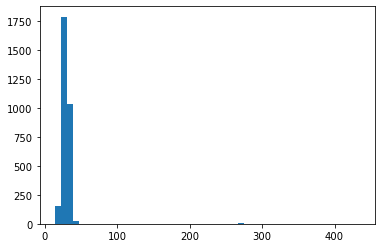

In [442]:
null_obj_amount = ds_obj["train"].BMI.isnull().sum()
# 737 NaN

_ = plt.hist(ds_obj["train"].BMI, bins = 50)

we can see outliers at around 270. BMI cannot be this big. max BMI is around 50 i would say. Every BMI above this would receive an average of the population, since I assume that the measurement is simply incorrect

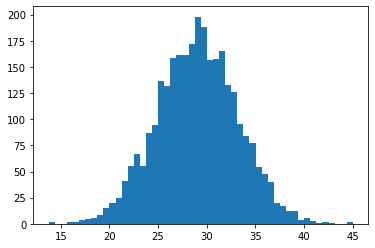

In [443]:
bmi_max_val = 50
mean_train_BMI = np.mean(ds_obj["train"].BMI)
outlier_bmi_mask = ds_obj["train"].BMI>bmi_max_val


ds_obj["train"].loc[outlier_bmi_mask, "BMI"] = mean_train_BMI

_ = plt.hist(ds_obj["train"].BMI, bins = 50)

**TODO**:
It would be better to take mean for the appropriating Age and Sex category, since those are physical parameters as well

# 2. SEX
**should be categorical**

In [444]:
# ds_obj["train"].Sex = ds_obj["train"].Sex.map( {'F':0, 'M':1}).astype(int)

ds_obj["train"].Sex.isnull().sum()

729

what do i do with NaN?.... drop? need to find correlation with some other class

# 3. Expenses
**continuous data**

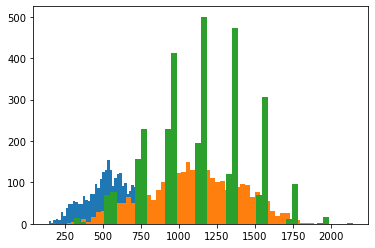

In [445]:
_ = plt.hist(ds_obj["train"].AvgHouseholdExpenseOnPresents, bins = 50)
_ = plt.hist(ds_obj["train"].AvgHouseholdExpenseOnSocialGames, bins = 50)
_ = plt.hist(ds_obj["train"].AvgHouseholdExpenseParkingTicketsPerYear, bins = 50)

# 4. Age group
**should be changed to int**


In [446]:
ds_obj["train"]["AgeGroupInt"] = \
ds_obj["train"]["AgeGroup"].astype('Int64')

In [447]:
ds_obj["train"] = ds_obj["train"].drop(['AgeGroup'], axis=1) 

# 5. PCR results
**let's see if there's correlation between those results. If so, some of those inputs can be dropped out**

we will look at the correlation graphs and at the pearson coefficients

Text(0.5, 1.0, 'Correlation Matrix')

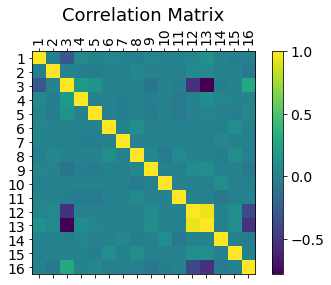

In [448]:
relevant_fields = ["pcrResult" + str(i+1) for i in range(16)]  
ticks_names = [str(i+1) for i in range(16)]  

ds_obj_pcr = ds_obj["train"][relevant_fields]
corr_df = ds_obj_pcr.corr('pearson')

# show as heatmap
f = plt.figure()
plt.matshow(corr_df, fignum=f.number)
plt.xticks(range(16), ticks_names, fontsize=14, rotation = 'vertical')
plt.yticks(range(16), ticks_names, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=18)



conclusions:
1. pcr results 12, 13 are strongly correlated
2. pcr results 3, 13 are strongly negatively correlated
3. pcr results 3, 12 are strongly negatively correlated
3. pcr results 16, 13 are strongly negatively correlated
4. pcr results 16, 12 are strongly negatively correlated

Conclusion:
we can remove the following features: 3, 12, 16. They are strongly correlated with feature 13

# Mutual information on the categorical data

Checking which data is categorical

In [449]:
virus_df.dtypes

PatientID                                     int64
Address                                      object
AgeGroup                                    float64
AvgHouseholdExpenseOnPresents               float64
AvgHouseholdExpenseOnSocialGames            float64
AvgHouseholdExpenseParkingTicketsPerYear    float64
AvgMinSportsPerDay                          float64
AvgTimeOnSocialMedia                        float64
AvgTimeOnStuding                            float64
BMI                                         float64
BloodType                                    object
CurrentLocation                              object
DateOfPCRTest                                object
DisciplineScore                             float64
HappinessScore                              float64
Job                                          object
NrCousins                                   float64
SelfDeclarationOfIllnessForm                 object
Sex                                          object
StepsPerYear

# 1. Blood type

In [450]:
print(virus_df.BloodType.unique())
print(f"There are {len(virus_df.BloodType.unique())} types")

[nan 'AB+' 'O+' 'A-' 'B+' 'B-' 'A+' 'O-' 'AB-']
There are 9 types


it's obvious that those are the categories. First convert the NaN into new category - Unknown

In [451]:
virus_df.BloodType = virus_df.BloodType.astype('category')
virus_df.BloodType = virus_df.BloodType.cat.add_categories("Unknown")
virus_df.BloodType = virus_df.BloodType.fillna("Unknown")



In [452]:
virus_df["BloodTypeInt"] = virus_df.BloodType.cat.rename_categories(range(virus_df.BloodType.nunique())).astype(int)
virus_df = virus_df.drop(columns="BloodType")

# 2. Job

In [453]:
print(f"There are {len(virus_df.Job.unique())} Job types")

There are 632 Job types


That's too many categories. I think we should drop this one

# 3. Sex

In [454]:
print(virus_df.Sex.unique())
print(f"There are {len(virus_df.Sex.unique())} Sex types")

total = virus_df.shape[0]
F_size = sum(virus_df.Sex == "F")
M_size = sum(virus_df.Sex == "M")
nan_size = total - F_size - M_size
print("")
print(f"F : {F_size}/{total} ")
print(f"M : {M_size}/{total} ")
print(f"nan : {nan_size}/{total}")

['F' 'M' nan]
There are 3 Sex types

F : 2048/5000 
M : 1984/5000 
nan : 968/5000


Filling the NaN with another class - No Gender

In [455]:
virus_df.Sex = virus_df.Sex.astype('category')
virus_df.Sex = virus_df.Sex.cat.add_categories("No Gender")
virus_df.Sex = virus_df.Sex.fillna("No Gender")

In [456]:
virus_df["SexInt"] = virus_df.Sex.cat.rename_categories(range(virus_df.Sex.nunique())).astype(int)
virus_df = virus_df.drop(columns="Sex")

# 4. Syndrome Class

In [457]:
print(f"There are {len(virus_df.SyndromeClass.unique())} Syndrome Class")
virus_df.SyndromeClass.unique()

There are 5 Syndrome Class


array([ 2.,  3.,  1., nan,  4.])

In [458]:
nan_sum = sum(virus_df.SyndromeClass.isnull())
print(f"There are {nan_sum} nan syndrome classes")

There are 990 nan syndrome classes


In [459]:
virus_df.SyndromeClass.unique()

array([ 2.,  3.,  1., nan,  4.])

Have to check the correlation between the syndromes and the test results to understand if that's category or not

# 5. SelfDeclataion

In [460]:
print(f"There are {len(virus_df.SelfDeclarationOfIllnessForm.unique())} SelfDeclarationOfIllnessForm types")

There are 435 SelfDeclarationOfIllnessForm types


Important metric  - first derive unique classes

In [461]:
unique_self_declaracion_classes = []

def parse_syndromes(syndromes_str : str) -> list:
    syndromes_list = []
    syndromes_str = syndromes_str.split(sep = ";")
    
    for syndrome in syndromes_str:
        syndrome = syndrome.strip()
        syndromes_list.append(syndrome)
        
    return syndromes_list

for syndromes_list in virus_df.SelfDeclarationOfIllnessForm.unique():
    if not isinstance(syndromes_list, str):
        continue
      
    syndromes = parse_syndromes(syndromes_list)
    for syndrome in syndromes:
        if syndrome not in unique_self_declaracion_classes:
            unique_self_declaracion_classes.append(syndrome)

unique_self_declaracion_classes            

['Diarrhea',
 'Nausea_or_vomiting',
 'Shortness_of_breath',
 'Congestion_or_runny nose',
 'Headache',
 'Fatigue',
 'Muscle_or_body_aches',
 'Chills',
 'Skin_redness',
 'New_loss_of_taste_or_smell',
 'Sore_throat']

Good! Now for each syndrome, we create a new category, which will be binary category (0, 1)
Let's say we go over all of our training dataset.
I will use loop since we have to parse each self declaration for each sample

In [462]:
def add_syndrom_categories(virus_df, syndromes_classes) -> pd.DataFrame:
    # parse each sample of syndromes_df
    # and set True for specific category
    
    syndromes_dict = {}
    
    for syndrom in syndromes_classes:
        syndromes_dict[syndrom] = np.zeros(virus_df.shape[0])
    
        
    
    for idx, sample in enumerate(virus_df.SelfDeclarationOfIllnessForm):
        if not isinstance(sample, str):
            continue
        syndromes_list = parse_syndromes(sample)
        
        for syndrome in syndromes_list:
            syndromes_dict[syndrome][idx] = 1
        
    return syndromes_dict


# dict for each symptom, list of booleans
syndromes_dict = add_syndrom_categories(virus_df, unique_self_declaracion_classes)
syndromes_list = []

# change each to category in the dataset
for key in syndromes_dict.keys():
    virus_df[key] = syndromes_dict[key]
    virus_df[key] = virus_df[key].astype('category')
    
    # create the binary equivalent
    virus_df[f"{key}Int"] = virus_df[key].cat.rename_categories(range(virus_df[key].nunique())).astype(int)
    virus_df = virus_df.drop(columns=key)
    syndromes_list.append(f"{key}Int")
    

virus_df.drop(columns=['SelfDeclarationOfIllnessForm'])


virus_df.dtypes


PatientID                                     int64
Address                                      object
AgeGroup                                    float64
AvgHouseholdExpenseOnPresents               float64
AvgHouseholdExpenseOnSocialGames            float64
AvgHouseholdExpenseParkingTicketsPerYear    float64
AvgMinSportsPerDay                          float64
AvgTimeOnSocialMedia                        float64
AvgTimeOnStuding                            float64
BMI                                         float64
CurrentLocation                              object
DateOfPCRTest                                object
DisciplineScore                             float64
HappinessScore                              float64
Job                                          object
NrCousins                                   float64
SelfDeclarationOfIllnessForm                 object
StepsPerYear                                float64
SyndromeClass                               float64
TimeOnSocial

### Checking the Mutual Information with the TestResultsCode

#### creating the labels encoding

In [463]:
#test result classified by labels
li = virus_df.TestResultsCode.tolist()
labels =  [ item.split('_') for item in li ] 
for item in labels:
    if len(item)==4:
        add =  item[0]+item[1]     
        item = item.insert( 0, add  )
for item in labels:
    if 'not' in item:
        item.remove('not')
    if 'detected' in item:
        item.remove('detected')
        
labels[0:20]

[['flue', 'Spreader', 'NotatRisk'],
 ['measles', 'NotSpreader', 'NotatRisk'],
 ['notdetected', 'NotSpreader', 'atRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['flue', 'Spreader', 'atRisk'],
 ['covid', 'NotSpreader', 'atRisk'],
 ['notdetected', 'Spreader', 'atRisk'],
 ['notdetected', 'Spreader', 'NotatRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['measles', 'NotSpreader', 'atRisk'],
 ['measles', 'NotSpreader', 'NotatRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['covid', 'NotSpreader', 'atRisk'],
 ['flue', 'Spreader', 'NotatRisk'],
 ['cold', 'Spreader', 'NotatRisk'],
 ['notdetected', 'NotSpreader', 'atRisk'],
 ['flue', 'Spreader', 'atRisk'],
 ['cold', 'NotSpreader', 'atRisk']]

In [464]:
#one-hot encode the test results
disease = [ la[0] for la in labels ]
spread = [  la[1] for la in labels  ]
risk = [  la[2] for la in labels  ]

disease_encode = pd.Series( disease  ).str.get_dummies()
spread_encode = pd.Series( spread  ).str.get_dummies()
risk_encode = pd.Series( risk  ).str.get_dummies()
risk_encode.head(3)

,NotatRisk,atRisk
0,1,0
1,1,0
2,0,1


In [465]:
#interate one hot encoding of test results back to df
virus_df = virus_df.drop(columns = 'TestResultsCode')

In [466]:

future_labels = (list(disease_encode.columns))
future_labels.append(spread_encode.columns[1])
future_labels.append(risk_encode.columns[1])
print(f"All posible labels are : {future_labels}")

All posible labels are : ['cmv', 'cold', 'covid', 'flue', 'measles', 'notdetected', 'Spreader', 'atRisk']


### Concatenate all the labels with the dataset

In [467]:
spread_encode = spread_encode.drop(['NotSpreader'], axis=1) 
risk_encode = risk_encode.drop(['NotatRisk'], axis=1) 

frames = [virus_df, disease_encode, spread_encode, risk_encode]
df_total = pd.concat(frames, axis=1)
df_total.shape

(5000, 57)

In [468]:
df_total.head(3)

,PatientID,Address,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,...,New_loss_of_taste_or_smellInt,Sore_throatInt,cmv,cold,covid,flue,measles,notdetected,Spreader,atRisk
0,0,8520 Dougherty Common Apt. 318\nLake Annamouth...,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,...,0,0,0,0,0,1,0,0,1,0
1,1,"9338 Griffin Route\nThorntonshire, WY 36917",NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,2,"8350 Adam Streets\nLake Angelaberg, MS 13029",NaN,270.970619,562.33635,1151.389973,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1


For each of the categorical features that we have, we check the Mutual Information and the Correlation with each of the labels.
Actually, we'll create kind of a table and see the most relevant features (or their permutations) to each of the label (7 labels)

In [469]:
from sklearn.feature_selection import mutual_info_classif

Create a dataframe from syndromes and for each target label separately

In [470]:
syndromes_list

['DiarrheaInt',
 'Nausea_or_vomitingInt',
 'Shortness_of_breathInt',
 'Congestion_or_runny noseInt',
 'HeadacheInt',
 'FatigueInt',
 'Muscle_or_body_achesInt',
 'ChillsInt',
 'Skin_rednessInt',
 'New_loss_of_taste_or_smellInt',
 'Sore_throatInt']

In [471]:
df_syndromes = df_total[syndromes_list]

In [472]:
MI_arr = np.zeros([len(future_labels), len(syndromes_list)])

for idx, label in enumerate(future_labels):
    df_label = df_total[label]
    MI = mutual_info_classif(X = df_syndromes.values, y = df_label.values)
    MI_arr[idx, :] = MI


Text(0.5, 1.0, 'Mutual Information Matrix')

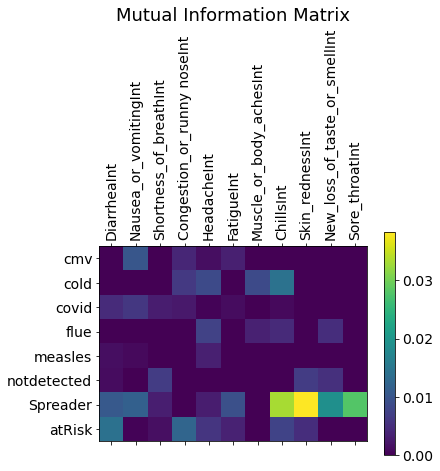

In [473]:
# show as heatmap
f = plt.figure()
plt.matshow(MI_arr, fignum=f.number)
plt.xticks(range(len(syndromes_list)), syndromes_list, fontsize=14, rotation = 'vertical')
plt.yticks(range(len(future_labels)), future_labels, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Mutual Information Matrix', fontsize=18)

In [474]:
df_total.dtypes

PatientID                                     int64
Address                                      object
AgeGroup                                    float64
AvgHouseholdExpenseOnPresents               float64
AvgHouseholdExpenseOnSocialGames            float64
AvgHouseholdExpenseParkingTicketsPerYear    float64
AvgMinSportsPerDay                          float64
AvgTimeOnSocialMedia                        float64
AvgTimeOnStuding                            float64
BMI                                         float64
CurrentLocation                              object
DateOfPCRTest                                object
DisciplineScore                             float64
HappinessScore                              float64
Job                                          object
NrCousins                                   float64
SelfDeclarationOfIllnessForm                 object
StepsPerYear                                float64
SyndromeClass                               float64
TimeOnSocial